# Präsentation der Ergebnisse (Regressions-Case)

#### Libraries

In [25]:
# libraries
import sys
import time
import random
import copy

import pandas as pd
import sklearn as sk
import tensorflow as tf
from tensorflow import keras
import numpy as np
from numpy.linalg import inv
from tensorflow.python.ops.gen_array_ops import scatter_nd_eager_fallback
from tensorflow.python.ops.gen_logging_ops import timestamp
import matplotlib.pyplot as plt


#### Set-Up für Sims:

In [26]:
# Set seed
random.seed(42)

# Regressions Fall:

$y = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + \beta_3 * x_3$

## Daten Simulieren

In [27]:
n=100
X = np.random.uniform(low=1, high=5, size =(n*3))
X = X.reshape(n, 3)
koef = np.array((3, 5, 7))
koef = koef.reshape(3,1)
noise = np.random.normal(loc=0.0, scale=1, size=n)
noise = noise.reshape(n, 1)
y = 1 + np.matmul(X, koef) + noise
y = pd.DataFrame(y)
X = pd.DataFrame(X)


## Hyperparameter u. Rest:

- Differenz (h): 0.0001
- Optimieren über Gradient Descent, daher Batch_size = n


In [28]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD')

## Grundlegendes Modell:

In [29]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(1, activation='linear', batch_input_shape=(None, 3)))
model0.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
model0.summary()

Model: "sequential_202"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_202 (Dense)           (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist = model0.fit(X, y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)

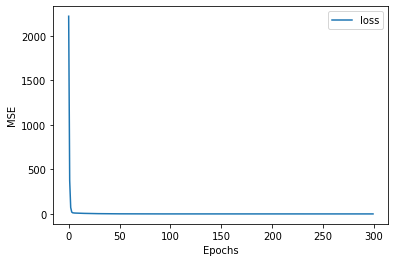

In [31]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [32]:
# "Schätzer"
yhat = model0.predict(X)
model0.get_weights()

[array([[3.008604 ],
        [4.910046 ],
        [6.9327903]], dtype=float32),
 array([1.4282472], dtype=float32)]

## Finite Differenzes


In [33]:

gewichte_m1 = [ ]
h = 0.0001
y_iter = []
gewichte_m2 = [ ]
fits = []

In [34]:
%%capture
for i in range(len(X)):
  temp_y = copy.deepcopy(y)
  temp_y.loc[i] += h
  y_iter.append(temp_y)
  np.sum(temp_y - y)
  model2 = tf.keras.Sequential();
  model2.add(tf.keras.layers.Dense(1, activation='linear', batch_input_shape=(None, 3)));
  model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt);
  hist = model2.fit(X, temp_y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0);
  coefs_m2 = np.vstack((model2.get_weights()[0]))
  gewichte_m2.append( coefs_m2 )
  temp_pred = model2.predict(X)
  fits.append(temp_pred[i]);

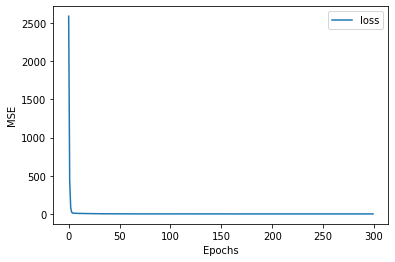

In [35]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [36]:
np.sum((fits - yhat) / h)

688.59094

# Zwei Parameter Regression ein Hidden Layer

## Grundlegendes Modell

In [ ]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(3,  activation='linear', batch_input_shape=(None, 3)))
model0.add(tf.keras.layers.Dense(1,  activation='linear'))
model0.compile(loss=tf.kera s.losses.MeanSquaredError(), optimizer=opt)
model0.summary()

In [ ]:
history = model0.fit(X, y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)

In [ ]:
plt.plot(history.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# "Schätzer"
yhat = model0.predict(X)
model0.get_weights()

## Finite Differenzen:

In [ ]:
gewichte_m1 = [ ]
h = 0.0001
y_iter = []
gewichte_m2 = [ ]
fits = []

In [ ]:
for i in range(len(X)):
  temp_y = copy.deepcopy(y)
  temp_y.loc[i] += h
  y_iter.append(temp_y)
  np.sum(temp_y - y)
  # Fitten der Modelle:
  model2 = tf.keras.Sequential()
  model2.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
  model2.add(tf.keras.layers.Dense(1,  activation='linear'))
  model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
  hist = model2.fit(X, temp_y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)
  coefs_m2 = np.vstack((model2.get_weights()[0]))
  gewichte_m2.append( coefs_m2 )
  temp_pred = model2.predict(X)
  fits.append(temp_pred[i])

In [ ]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
np.sum((fits - yhat) / h)

# Zwei Parameter Regression zwei Hidden Layer

## Grundlegendes Modell:

In [ ]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
model0.add(tf.keras.layers.Dense(1,  activation='linear'))
model0.add(tf.keras.layers.Dense(1,  activation='linear'))
model0.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
model0.summary()

In [ ]:
history = model0.fit(X, y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
# "Schätzer"
yhat = model0.predict(X)
model0.get_weights()

## Finite Differenzen

In [ ]:
gewichte_m1 = [ ]
h = 0.0001
y_iter = []
gewichte_m2 = [ ]
fits = []

In [ ]:
for i in range(len(X)):
  temp_y = copy.deepcopy(y)
  temp_y.loc[i] += h
  y_iter.append(temp_y)
  np.sum(temp_y - y)
  # Fitten der Modelle:
  model2 = tf.keras.Sequential()
  model2.add(tf.keras.layers.Dense(1,  activation='linear', batch_input_shape=(None, 1)))
  model2.add(tf.keras.layers.Dense(1,  activation='linear'))
  model2.add(tf.keras.layers.Dense(1,  activation='linear'))
  model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt)
  hist = model2.fit(X, temp_y, epochs = 300, batch_size=100, use_multiprocessing=True, verbose=0)
  coefs_m2 = np.vstack((model2.get_weights()[0]))
  gewichte_m2.append( coefs_m2 )
  temp_pred = model2.predict(X)
  fits.append(temp_pred[i])

In [ ]:
plt.plot(hist.history['loss'])
plt.legend(['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.show()

In [ ]:
np.sum((fits - yhat) / h)